## **2. Exploratory Data Analysis**

Building on EDA 1's findings that conflict-affected regions show accelerated solar capacity growth (0 to 8,000+ MW over 15 years), this second exploration focuses exclusively on **conflict-affected countries** to understand how different **phases of conflict** influence solar photovoltaic deployment patterns.

In this data exploration, we will examine the same cleaned dataset but filter it to analyze only conflict-affected countries and their solar energy development across different conflict phases. The analysis follows a structured approach:

**Data Preparation**: Filtering to conflict-affected countries only, conflict phase labeling, and focused data quality checks for solar energy metrics.

Based on this [**research document**](https://docs.google.com/document/d/1uxgQp8gesLcbfaCGLQAHn3Kgvyu2ZDGxgG-LSWEfq8s/edit?tab=t.0#heading=h.eeoohb5d7fi7) the phases of the 9 conflict countries were added.

**Key Analysis Areas**:
- **Conflict Phase Mapping**: Categorizing each country-year into Pre-Conflict, Active Conflict, and Post-Conflict phases
- **Solar Capacity by Phase**: Examining how solar deployment varies across different conflict phases
- **Country-Specific Patterns**: Analyzing individual country trajectories through conflict phases
- **Temporal Phase Analysis**: Understanding timing relationships between conflict events and solar infrastructure development
- **Capacity Variation Analysis**: Investigating high vs. low capacity patterns within conflict-affected regions

**Purpose**: To reveal how different phases of armed conflict specifically influence solar photovoltaic system deployment, capacity utilization, and development patterns within conflict-affected communities, providing insights into the complex relationship between conflict dynamics and renewable energy infrastructure.


In [ ]:
# 1. Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

: 

In [44]:
# Visualization settings
%matplotlib inline
sns.set(style="whitegrid", palette="pastel")

In [45]:
# 2. Load Dataset

url = "https://raw.githubusercontent.com/MIT-Emerging-Talent/ET6-CDSP-group-08-repo/ongrid_analysis/1_datasets/cleaned_data/IRENA_ONGRIDStats.cleaned.xlsx"
df = pd.read_excel(url, engine="openpyxl")

In [ ]:
# 3. Quick Preview
print(df.head())
print("Shape of dataset:", df.shape)

   Region       Sub-region  Country ISO3 code         RE or Non-RE  \
0  Africa  Northern Africa  Algeria       DZA  Total Non-Renewable   
1  Africa  Northern Africa  Algeria       DZA  Total Non-Renewable   
2  Africa  Northern Africa  Algeria       DZA  Total Non-Renewable   
3  Africa  Northern Africa  Algeria       DZA  Total Non-Renewable   
4  Africa  Northern Africa  Algeria       DZA  Total Non-Renewable   

  Group Technology   Technology Sub-Technology        Producer Type  Year  \
0     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2000   
1     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2001   
2     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2002   
3     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2003   
4     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2004   

   Electricity Installed Capacity (MW) Conflict_Status  
0                              5459.01    Non-Conflict  
1 

In [ ]:
# 4. Working with Conflict countries only
# Drop all rows where conflict_status == "non-conflict"
df = df[df["Conflict_Status"] != "Non-Conflict"]

# Optional: reset the index after filtering
df = df.reset_index(drop=True)

# Delete conflict column
df = df.drop(columns=["Conflict_Status"])


# Display the result
df.head()

,Region,Sub-region,Country,ISO3 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Installed Capacity (MW)
0,Africa,Northern Africa,Libya,LBY,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2000,930.0
1,Africa,Northern Africa,Libya,LBY,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2001,930.0
2,Africa,Northern Africa,Libya,LBY,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2002,1095.0
3,Africa,Northern Africa,Libya,LBY,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2003,1095.0
4,Africa,Northern Africa,Libya,LBY,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2004,1095.0


In [48]:
# 5. Phases labeling:   Pre-Conflict, Conflict, Post-Conflict
# marking each row (per country, per year) in a separate file
# Make a copy of the full DataFrame
labeled_df = df.copy()

In [49]:
#'Year' column is integer
labeled_df["Year"] = labeled_df["Year"].astype(int)

In [50]:
conflict_phases = {
    "Iraq": {
        "pre-conflict": range(2000, 2003),  # 2000–2002
        "active-conflict": range(2003, 2018),  # 2003–2017
        "post-conflict": range(2018, 2025),  # 2018–2024
    },
    "Afghanistan": {
        "pre-conflict": range(2000, 2001),  # 2000
        "active-conflict": range(2001, 2022),  # 2001–2021
        "post-conflict": range(2022, 2025),  # 2022–2024
    },
    "Libya": {
        "pre-conflict": range(2000, 2011),  # 2000–2010
        "active-conflict": [2011] + list(range(2014, 2021)),  # 2011, 2014–2020
        "transitional": range(2012, 2014),  # 2012–2013
        "post-conflict": range(2021, 2025),  # 2021–2024
    },
    "Syria": {
        "pre-conflict": range(2000, 2011),  # 2000–2010
        "active-conflict": range(2011, 2025),  # 2011–2024
    },
    "Yemen": {
        "pre-conflict": range(2000, 2014),  # 2000–2013
        "active-conflict": range(2014, 2025),  # 2014–2024
    },
    "Ukraine": {
        "pre-conflict": range(2000, 2014),  # 2000–2013
        "active-conflict": range(2014, 2025),  # 2014–2024
    },
    "Ethiopia": {
        "pre-conflict": range(2000, 2020),  # 2000–2019
        "active-conflict": range(2020, 2023),  # 2020–2022
        "post-conflict": range(2023, 2025),  # 2023–2024
    },
    "South Sudan": {
        "pre-conflict": range(2000, 2012),  # 2000–2011
        "active-conflict": range(2013, 2021),  # 2013–2020
        "post-conflict": range(2021, 2025),  # 2021–2024
        "transitional": [2012],  # Independence year
    },
    "Sudan": {
        "pre-conflict": range(2000, 2003),  # 2000–2002
        "active-conflict": list(range(2003, 2006))
        + list(range(2019, 2022))
        + list(range(2023, 2025)),
        "transitional": list(range(2006, 2019)) + [2022],  # e.g. 2006–2018 + 2022
    },
}

In [51]:
def assign_conflict_phase(row):
    country = row["Country"]
    year = row["Year"]

    # Check if the country has defined phases
    if country in conflict_phases:
        for phase, years in conflict_phases[country].items():
            if year in years:
                return phase
        return "unknown"  # No phase matched, though country exists
    else:
        return "non-conflict"  # Country not in the dictionary


# Apply the function to assign the phase
labeled_df["Conflict Phase"] = labeled_df.apply(assign_conflict_phase, axis=1)
labeled_df

,Region,Sub-region,Country,ISO3 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Installed Capacity (MW),Conflict Phase
0,Africa,Northern Africa,Libya,LBY,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2000,930.00,pre-conflict
1,Africa,Northern Africa,Libya,LBY,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2001,930.00,pre-conflict
2,Africa,Northern Africa,Libya,LBY,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2002,1095.00,pre-conflict
3,Africa,Northern Africa,Libya,LBY,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2003,1095.00,pre-conflict
4,Africa,Northern Africa,Libya,LBY,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2004,1095.00,pre-conflict
...,...,...,...,...,...,...,...,...,...,...,...,...
934,Europe,Eastern Europe,Ukraine,UKR,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2019,1257.77,active-conflict
935,Europe,Eastern Europe,Ukraine,UKR,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2020,1402.00,active-conflict
936,Europe,Eastern Europe,Ukraine,UKR,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2021,1761.00,active-conflict
937,Europe,Eastern Europe,Ukraine,UKR,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2022,1761.00,active-conflict


In [65]:
# 7. SAVE FILE
# Filter only rows that are in a conflict phase
conflict_only_df = labeled_df[
    labeled_df["Conflict Phase"].isin(
        ["pre-conflict", "active-conflict", "post-conflict"]
    )
]
conflict_only_df.to_excel(
    "../1_datasets/cleaned_data/ONG_conflictcountriesonly.xlsx", index=False
)

In [53]:
# 8. Basic Info and Summary
print(labeled_df.info())
print(labeled_df.describe())
print("Columns:", labeled_df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               939 non-null    object 
 1   Sub-region                           939 non-null    object 
 2   Country                              939 non-null    object 
 3   ISO3 code                            939 non-null    object 
 4   RE or Non-RE                         939 non-null    object 
 5   Group Technology                     939 non-null    object 
 6   Technology                           939 non-null    object 
 7   Sub-Technology                       939 non-null    object 
 8   Producer Type                        939 non-null    object 
 9   Year                                 939 non-null    int32  
 10  Electricity Installed Capacity (MW)  939 non-null    float64
 11  Conflict Phase                  

In [54]:
# 9. Missing Values
print("Missing values per column:")
print(labeled_df.isnull().sum())

Missing values per column:
Region                                 0
Sub-region                             0
Country                                0
ISO3 code                              0
RE or Non-RE                           0
Group Technology                       0
Technology                             0
Sub-Technology                         0
Producer Type                          0
Year                                   0
Electricity Installed Capacity (MW)    0
Conflict Phase                         0
dtype: int64


In [55]:
# 10. Unique Value Checks (Sanity Check)
print("Number of Countries:", labeled_df["Country"].nunique())
print("Year Range:", labeled_df["Year"].min(), "-", labeled_df["Year"].max())
print("Years:", sorted(labeled_df["Year"].unique()))
print("Producer Types:", labeled_df["Producer Type"].unique())
print("RE Categories:", labeled_df["RE or Non-RE"].unique())

Number of Countries: 8
Year Range: 2000 - 2024
Years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Producer Types: ['On-grid electricity' 'Off-grid electricity']
RE Categories: ['Total Non-Renewable' 'Total Renewable']


In [56]:
df = labeled_df
df["Country"].value_counts()
df["Year"].min(), df["Year"].max()

(2000, 2024)

In [57]:
# 11. Value Distributions
print(df["Country"].value_counts())
print(df["Conflict Phase"].value_counts())

Country
Ukraine        182
Ethiopia       171
Afghanistan    151
Sudan (the)    130
Iraq           110
Yemen           84
Libya           74
South Sudan     37
Name: count, dtype: int64
Conflict Phase
active-conflict    397
pre-conflict       289
non-conflict       130
post-conflict      115
transitional         8
Name: count, dtype: int64


In [58]:
df.head()
df.tail()

,Region,Sub-region,Country,ISO3 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Installed Capacity (MW),Conflict Phase
934,Europe,Eastern Europe,Ukraine,UKR,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2019,1257.77,active-conflict
935,Europe,Eastern Europe,Ukraine,UKR,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2020,1402.00,active-conflict
936,Europe,Eastern Europe,Ukraine,UKR,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2021,1761.00,active-conflict
937,Europe,Eastern Europe,Ukraine,UKR,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2022,1761.00,active-conflict
938,Europe,Eastern Europe,Ukraine,UKR,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2023,1761.00,active-conflict


In [59]:
# 12. General Trends
# Filter for Solar PV only
solar_df = df[df["Group Technology"].str.contains("Solar")]

All countries in our data: ['Libya' 'Sudan (the)' 'Ethiopia' 'South Sudan' 'Afghanistan' 'Iraq'
 'Yemen' 'Ukraine']
High capacity countries: ['Ukraine']
Low capacity countries: ['Libya', 'Sudan (the)', 'Ethiopia', 'South Sudan', 'Afghanistan', 'Iraq', 'Yemen']


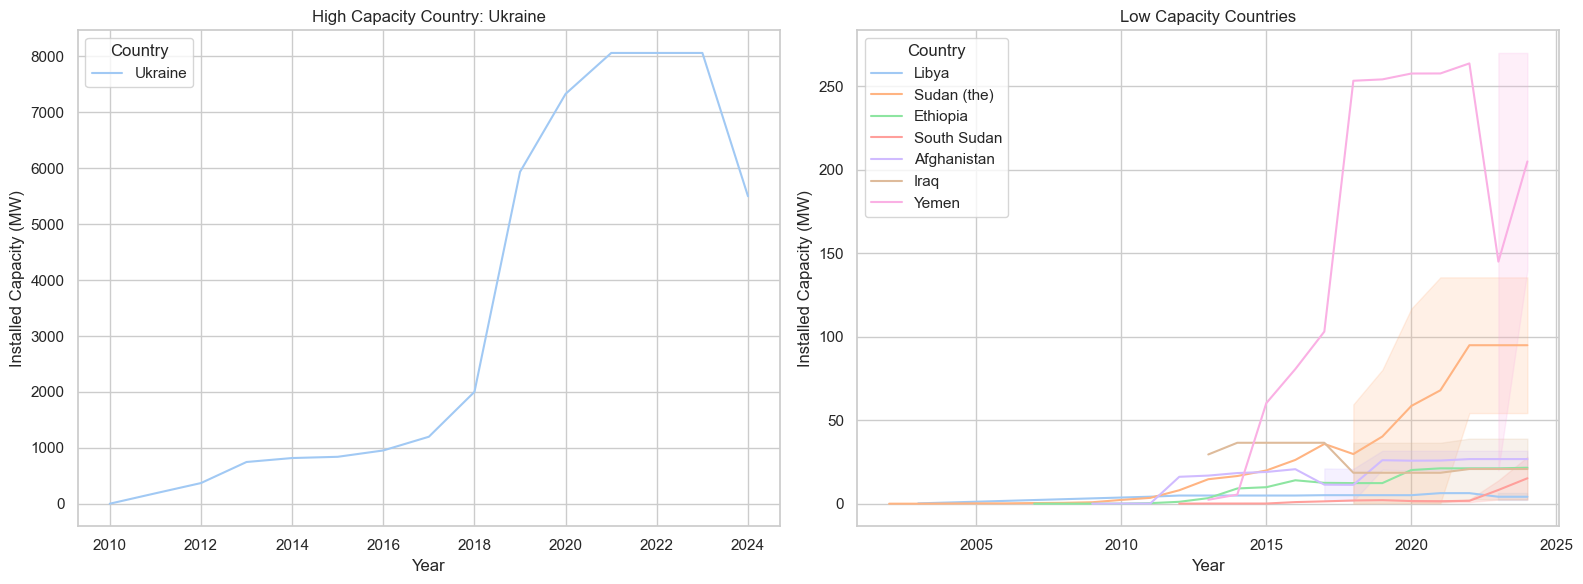

In [60]:
# 13. High vs Low Capacity
# Ukraine has much higher capacity than others, so we separate it
high_capacity_countries = ["Ukraine"]

# Getting all unique country names from our data
all_countries = solar_df["Country"].unique()
print("All countries in our data:", all_countries)

# Creating a list of countries that are NOT Ukraine (the low capacity ones)
low_capacity_countries = []
for country in all_countries:
    if country != "Ukraine":  # If it's not Ukraine
        low_capacity_countries.append(country)  # Add it to low capacity list

print("High capacity countries:", high_capacity_countries)
print("Low capacity countries:", low_capacity_countries)

# Then creating two graphs side by side to see difference
fig, (left_graph, right_graph) = plt.subplots(1, 2, figsize=(16, 6))
# 1 = one row, 2 = two columns, figsize makes it wide enough for both

# The LEFT graph (for high capacity countries)
# Filter our data to only include Ukraine
ukraine_data = solar_df[solar_df["Country"] == "Ukraine"]

# Plotting Ukraine's data on the left graph
sns.lineplot(
    data=ukraine_data,
    x="Year",
    y="Electricity Installed Capacity (MW)",
    hue="Country",
    ax=left_graph,
)

# Adding labels to the left graph
left_graph.set_title("High Capacity Country: Ukraine")
left_graph.set_ylabel("Installed Capacity (MW)")
left_graph.set_xlabel("Year")

# The RIGHT graph (for low capacity countries)
# Filter our data to exclude Ukraine (keep all others)
other_countries_data = solar_df[solar_df["Country"] != "Ukraine"]

# Plotting all other countries 8 on the right graph
sns.lineplot(
    data=other_countries_data,
    x="Year",
    y="Electricity Installed Capacity (MW)",
    hue="Country",
    ax=right_graph,
)

# Add labels to the right graph
right_graph.set_title("Low Capacity Countries")
right_graph.set_ylabel("Installed Capacity (MW)")
right_graph.set_xlabel("Year")

plt.tight_layout()
plt.show()

# - Left graph: Ukraine's dramatic growth (large numbers)
# - Right graph: All other countries (smaller numbers, but now visible!)

In [61]:
# 14. SOLAR ENERGY DATAFRAME
solar_df = df[
    df["RE or Non-RE"].str.contains("Total Renewable", case=False, na=False)
    & df["Group Technology"].str.contains("Solar energy", case=False, na=False)
].copy()

solar_df.head()

,Region,Sub-region,Country,ISO3 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Installed Capacity (MW),Conflict Phase
50,Africa,Northern Africa,Libya,LBY,Total Renewable,Solar energy,Solar photovoltaic,Off-grid Solar photovoltaic,Off-grid electricity,2003,0.2,pre-conflict
51,Africa,Northern Africa,Libya,LBY,Total Renewable,Solar energy,Solar photovoltaic,Off-grid Solar photovoltaic,Off-grid electricity,2004,0.7,pre-conflict
52,Africa,Northern Africa,Libya,LBY,Total Renewable,Solar energy,Solar photovoltaic,Off-grid Solar photovoltaic,Off-grid electricity,2005,1.2,pre-conflict
53,Africa,Northern Africa,Libya,LBY,Total Renewable,Solar energy,Solar photovoltaic,Off-grid Solar photovoltaic,Off-grid electricity,2006,1.7,pre-conflict
54,Africa,Northern Africa,Libya,LBY,Total Renewable,Solar energy,Solar photovoltaic,Off-grid Solar photovoltaic,Off-grid electricity,2007,2.2,pre-conflict


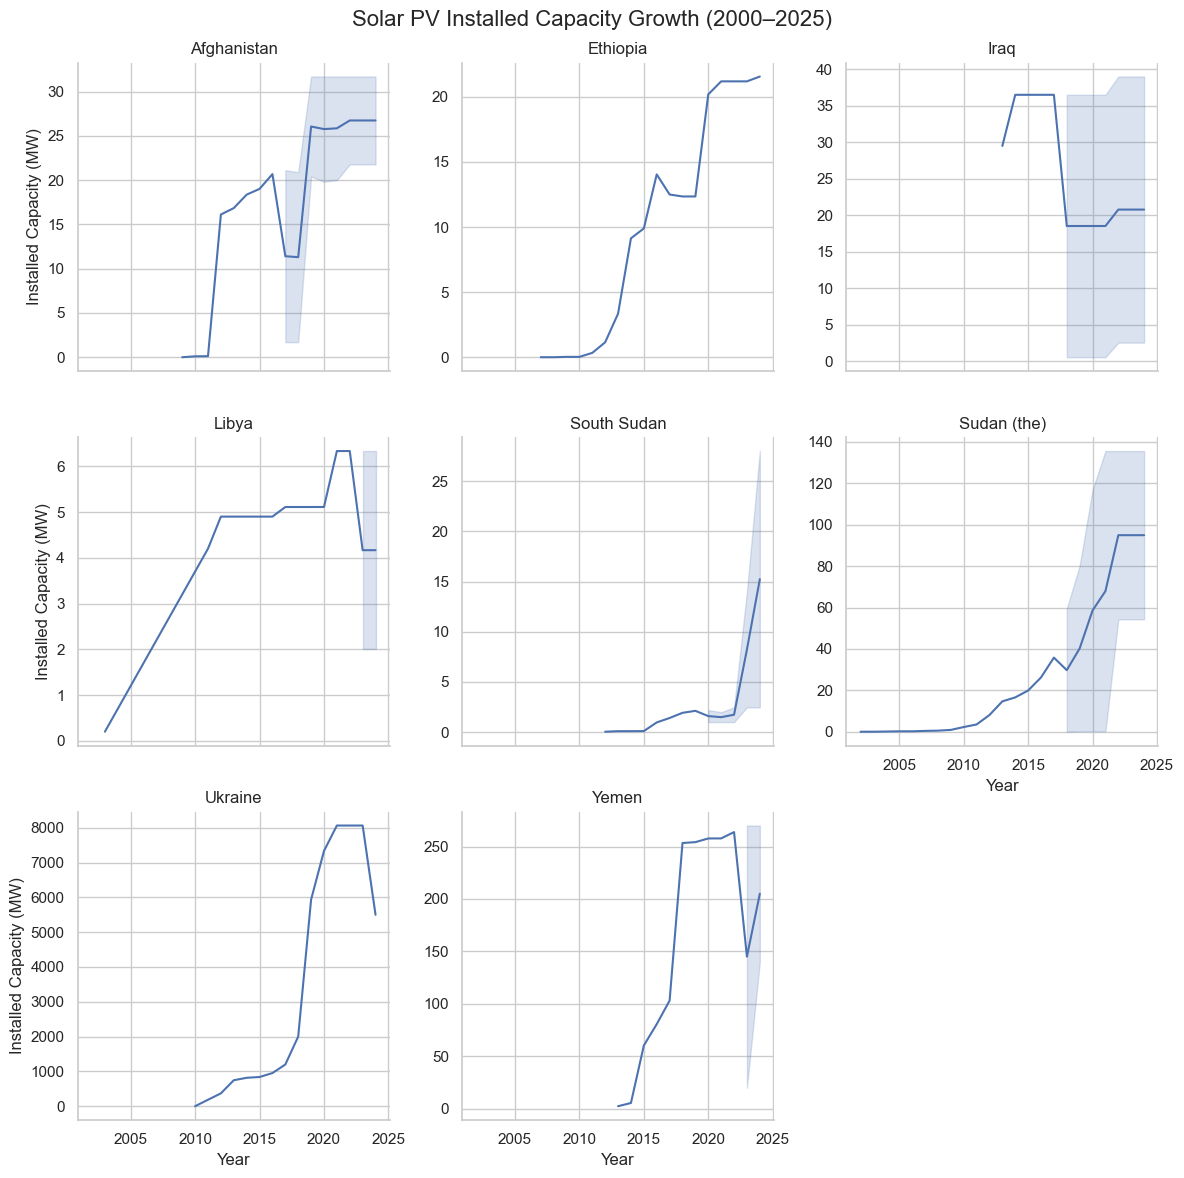

In [62]:
# 15. Plotting Solar PV Capacity Growth per country

# Sort just in case
solar_df = solar_df.sort_values(by=["Country", "Year"])

# Set plot style
sns.set(style="whitegrid")

# Create the FacetGrid
g = sns.FacetGrid(solar_df, col="Country", col_wrap=3, height=4, sharey=False)

# Map lineplot to each subplot
g.map_dataframe(sns.lineplot, x="Year", y="Electricity Installed Capacity (MW)")

# Formatting
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Installed Capacity (MW)")
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Solar PV Installed Capacity Growth (2000–2025)", fontsize=16)
plt.tight_layout()
plt.show()

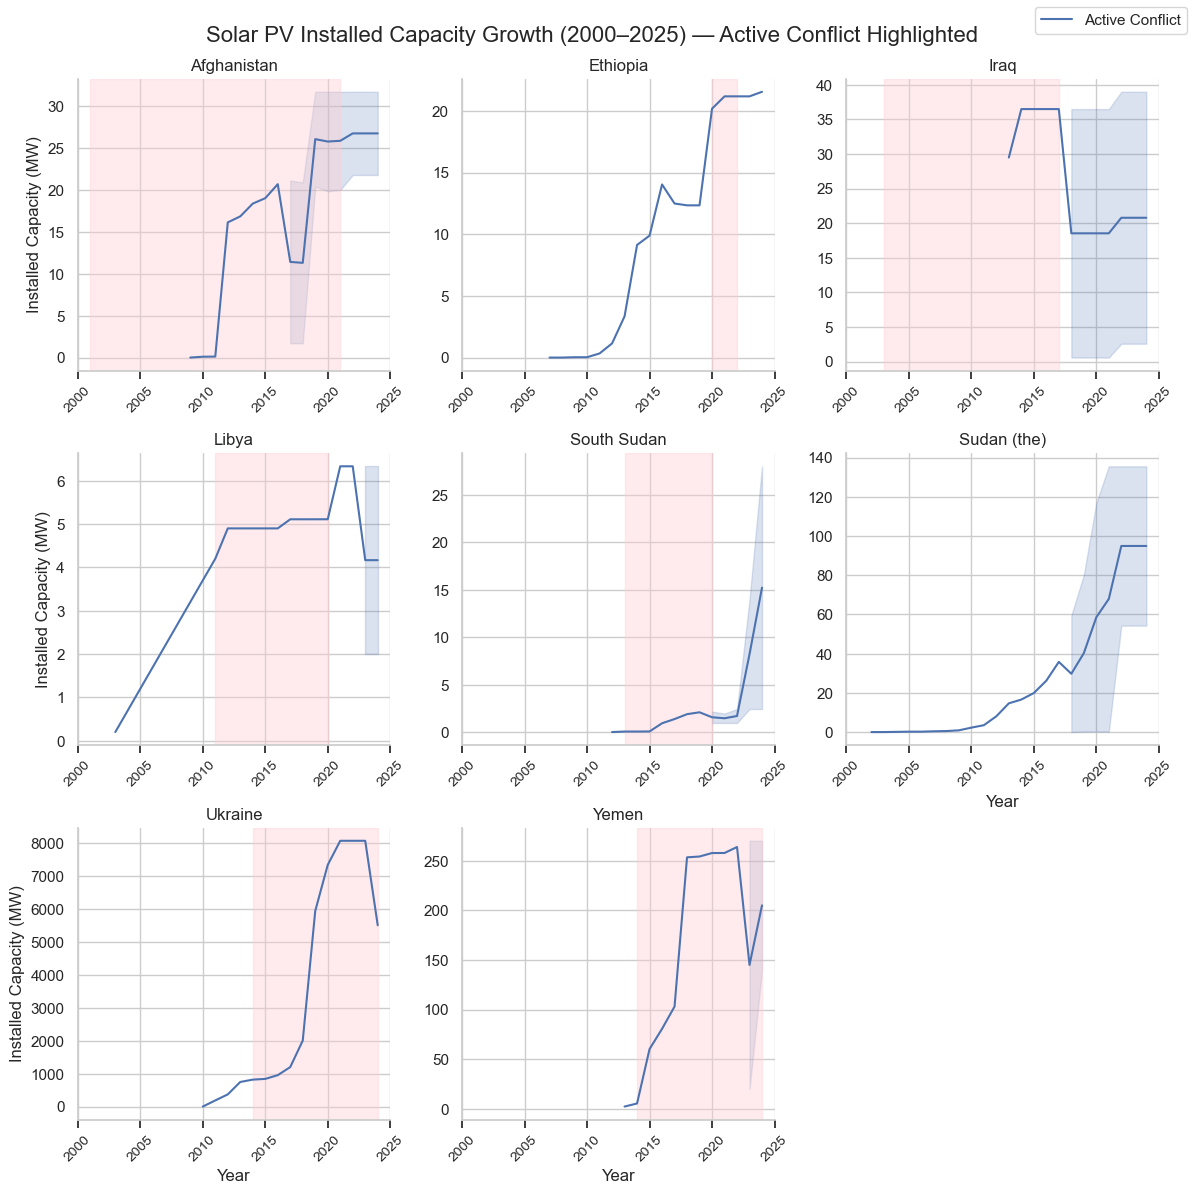

In [63]:
# 16. ADDING CONFLICT PHASES TO THE PLOT
# USING CLAUDE AI TO HELP GENERATE THIS CODE
# Example data structure (replace with your actual data)
# solar_df should have columns: Country, Year, Electricity Installed Capacity (MW)
# conflict_phases should be a dictionary with country names as keys

# Sort values
solar_df = solar_df.sort_values(by=["Country", "Year"])

# Set style
sns.set_style("whitegrid")

# Create FacetGrid
g = sns.FacetGrid(solar_df, col="Country", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x="Year", y="Electricity Installed Capacity (MW)")

# Format x-axis and highlight conflict phases for ALL countries
for ax, country in zip(g.axes.flat, solar_df["Country"].unique()):
    # Format x-axis to show years properly on EVERY subplot
    ax.tick_params(axis="x", rotation=45, labelsize=10)
    ax.set_xticks(range(2000, 2026, 5))  # Show years every 5 years from 2000 to 2025
    ax.set_xticklabels(range(2000, 2026, 5))  # Explicitly set the labels

    # Ensure x-axis limits cover the full range
    ax.set_xlim(2000, 2025)

    # Check if conflict_phases dictionary exists and has data for this country
    if "conflict_phases" in globals() and country in conflict_phases:
        active_years = conflict_phases.get(country, {}).get("active-conflict", [])
        if active_years:
            ax.axvspan(
                min(active_years),
                max(active_years),
                color="#ffcdd2",
                alpha=0.4,
                label="Active Conflict",
            )

# Ensure all subplots show x-axis labels (especially bottom row)
for ax in g.axes.flat:
    ax.tick_params(axis="x", which="both", bottom=True, labelbottom=True)

# Titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Installed Capacity (MW)")

# Add legend (only if there are conflict zones)
if "conflict_phases" in globals() and any(conflict_phases.values()):
    g.fig.legend(["Active Conflict"], loc="upper right")

# Adjust layout and add title
g.fig.subplots_adjust(top=0.85, bottom=0.15)  # Added bottom margin for rotated labels
g.fig.suptitle(
    "Solar PV Installed Capacity Growth (2000–2025) — Active Conflict Highlighted",
    fontsize=16,
)

plt.tight_layout()
plt.show()

Countries in our dataset: ['Afghanistan' 'Ethiopia' 'Iraq' 'Libya' 'South Sudan' 'Sudan (the)'
 'Ukraine' 'Yemen']
Total countries: 8

Creating 3 rows × 3 columns grid for 8 countries

Processing Afghanistan (position 1/8)
  - Peak capacity: 32 MW in 2019

Processing Ethiopia (position 2/8)
  - Peak capacity: 22 MW in 2024

Processing Iraq (position 3/8)
  - Peak capacity: 39 MW in 2022

Processing Libya (position 4/8)
  - Peak capacity: 6 MW in 2021

Processing South Sudan (position 5/8)
  - Peak capacity: 28 MW in 2024

Processing Sudan (the) (position 6/8)
  - Peak capacity: 136 MW in 2021

Processing Ukraine (position 7/8)
  - Peak capacity: 8062 MW in 2021

Processing Yemen (position 8/8)
  - Peak capacity: 270 MW in 2023


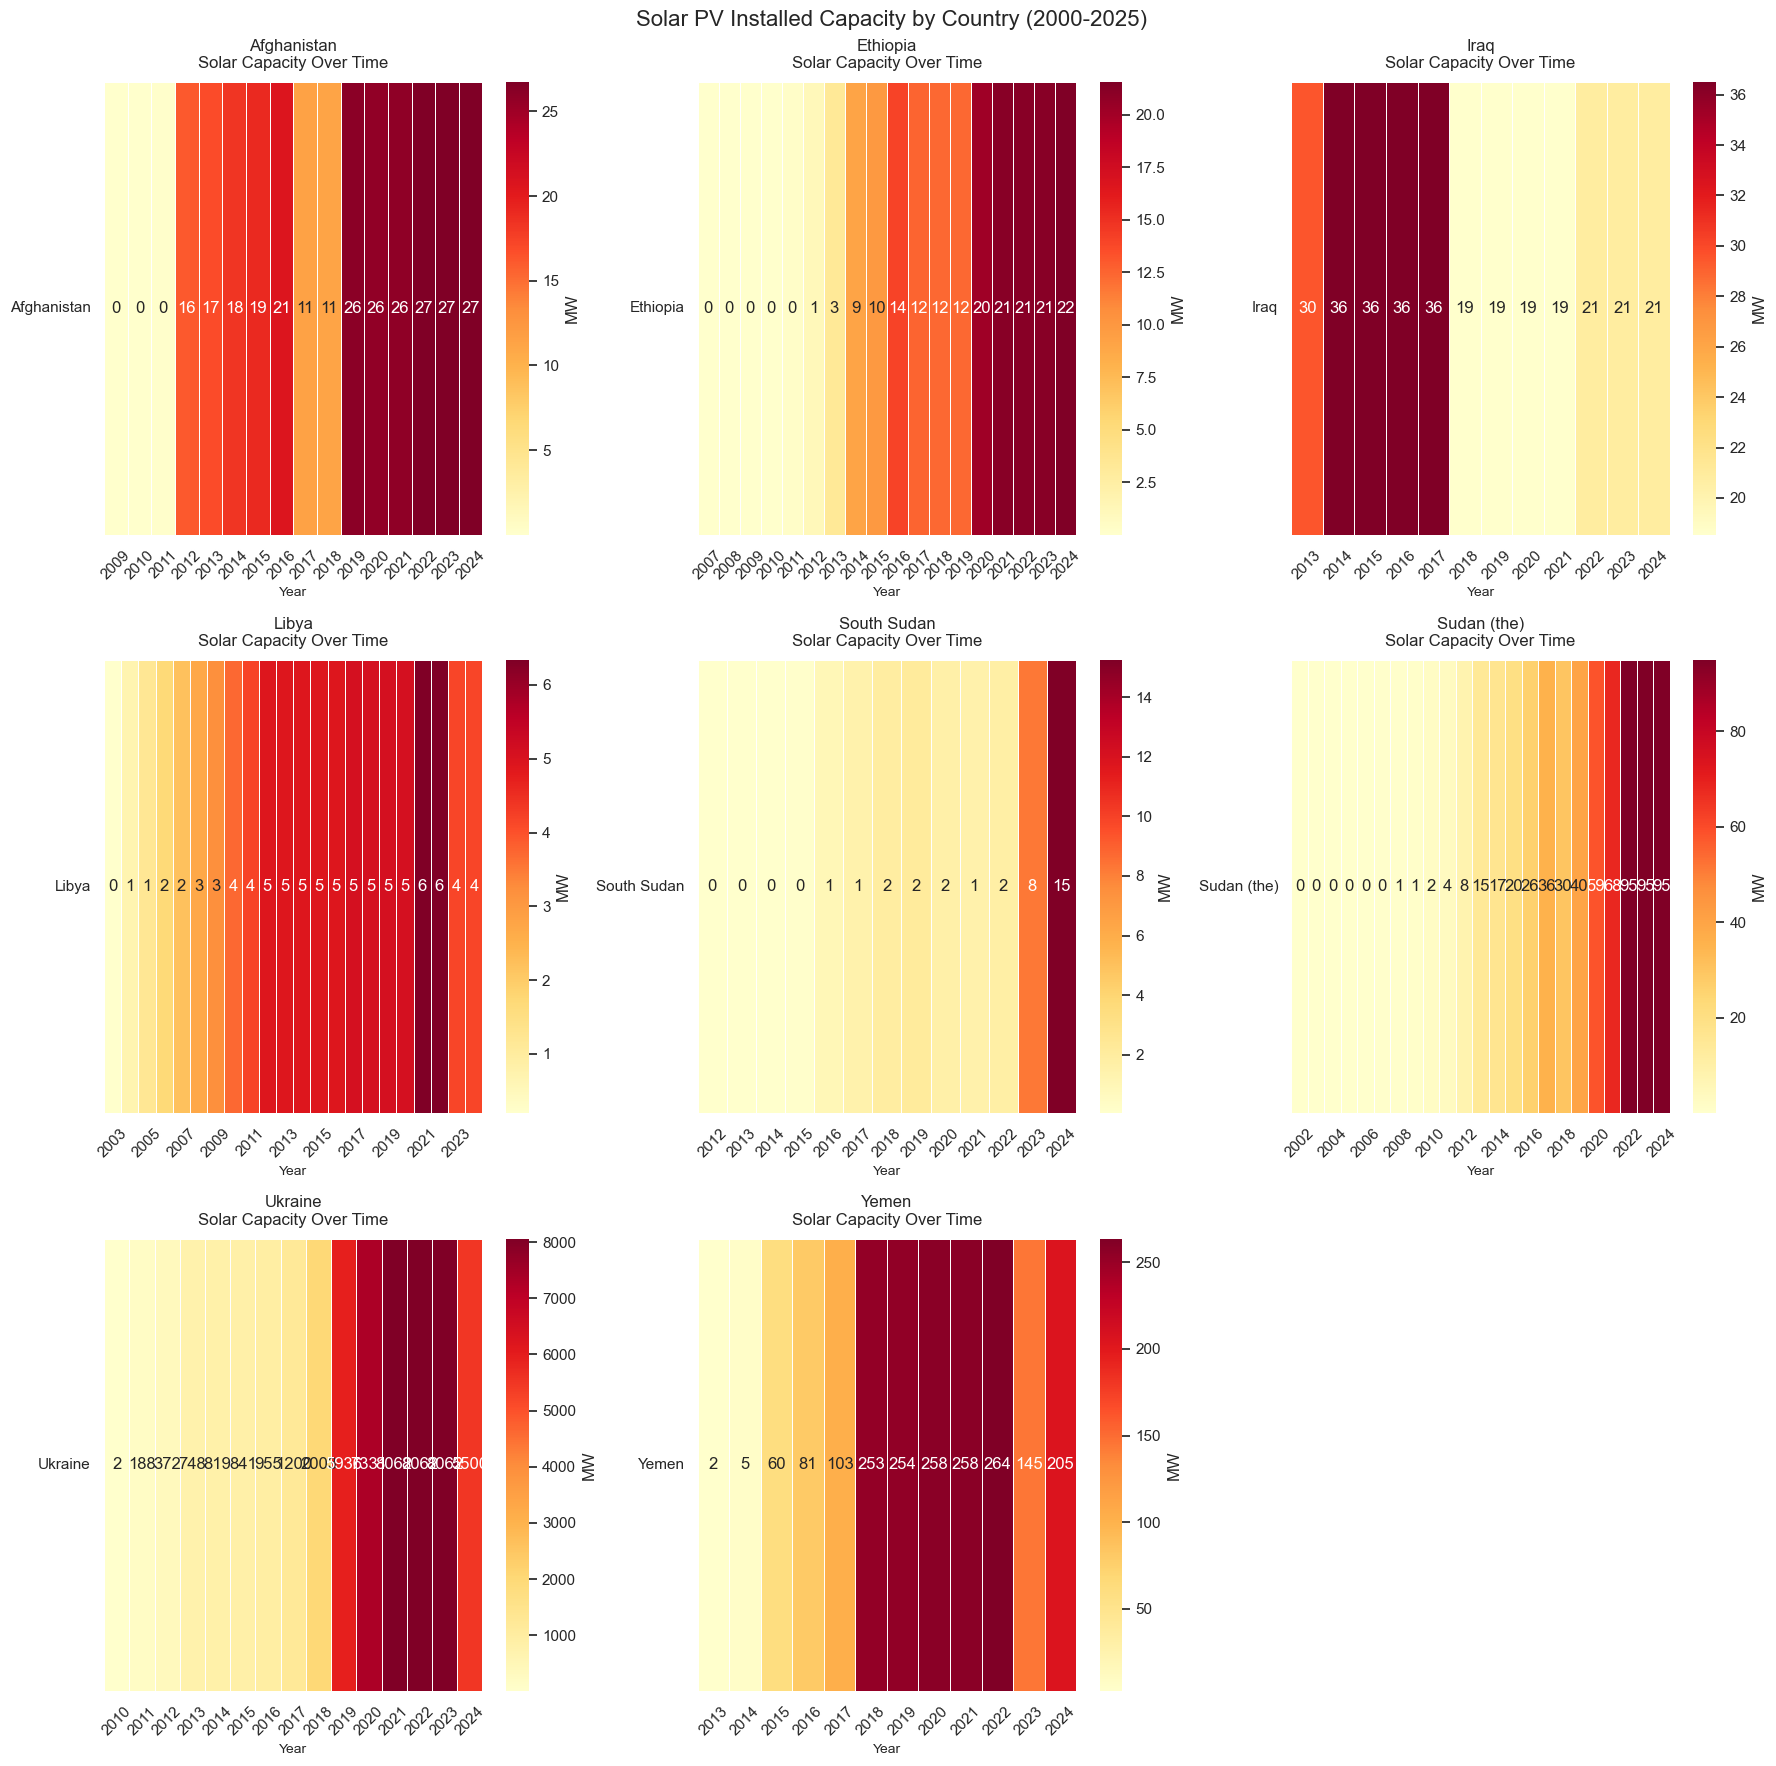


SUMMARY STATISTICS FOR ALL COUNTRIES

Countries ranked by maximum solar capacity:
Ukraine         | Max:     8062 MW | Latest:     5500 MW | Growth: High
Yemen           | Max:      270 MW | Latest:      270 MW | Growth: High
Sudan (the)     | Max:      136 MW | Latest:      136 MW | Growth: High
Iraq            | Max:       39 MW | Latest:       39 MW | Growth: Low
Afghanistan     | Max:       32 MW | Latest:       22 MW | Growth: Low
South Sudan     | Max:       28 MW | Latest:        2 MW | Growth: Low
Ethiopia        | Max:       22 MW | Latest:       22 MW | Growth: Low
Libya           | Max:        6 MW | Latest:        6 MW | Growth: Low

What each heatmap shows:
- Each row represents the country
- Each column represents a year
- Colors show capacity: Light = Low, Dark = High
- Numbers in cells show exact MW values
- You can see each country's growth pattern individually


In [64]:
# Creating Individual Heatmaps for Each Country
# This creates a separate heatmap for each country to show their solar growth pattern

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Get all countries in our data
countries = solar_df["Country"].unique()
print("Countries in our dataset:", countries)
print("Total countries:", len(countries))

# Step 2: Set up the grid for multiple heatmaps
# Calculate how many rows and columns we need
num_countries = len(countries)
cols = 3  # 3 heatmaps per row
rows = (num_countries + cols - 1) // cols  # Calculate rows needed

print(f"\nCreating {rows} rows × {cols} columns grid for {num_countries} countries")

# Create a large figure to hold all heatmaps
fig, axes = plt.subplots(rows, cols, figsize=(18, 6 * rows))

# Make sure axes is always a 2D array for easier handling
if rows == 1:
    axes = axes.reshape(1, -1)
elif cols == 1:
    axes = axes.reshape(-1, 1)

# Step 3: Create a heatmap for each country
for i, country in enumerate(countries):
    # Calculate which row and column this heatmap goes in
    row = i // cols
    col = i % cols

    print(f"\nProcessing {country} (position {i + 1}/{num_countries})")

    # Step 3a: Get data for this specific country
    country_data = solar_df[solar_df["Country"] == country].copy()

    # Step 3b: Prepare data for heatmap
    # For individual countries, we can show capacity by year in different ways
    # Option 1: Show as a single row (1 country × multiple years)

    # Create a pivot table for this country
    country_pivot = country_data.pivot_table(
        index="Country",
        columns="Year",
        values="Electricity Installed Capacity (MW)",
        fill_value=0,
    )

    # Step 3c: Create the heatmap for this country
    sns.heatmap(
        country_pivot,
        annot=True,  # Show numbers in each cell
        fmt=".0f",  # Show whole numbers
        cmap="YlOrRd",  # Yellow to Red color scheme
        cbar_kws={"label": "MW"},  # Color bar label
        ax=axes[row, col],  # Which subplot to use
        linewidths=0.5,  # Lines between cells
        square=False,  # Don't force square cells
    )

    # Step 3d: Format this heatmap
    axes[row, col].set_title(
        f"{country}\nSolar Capacity Over Time", fontsize=12, pad=10
    )
    axes[row, col].set_xlabel("Year", fontsize=10)
    axes[row, col].set_ylabel(
        "", fontsize=10
    )  # Remove y-label since it's just the country name

    # Rotate x-axis labels for better readability
    axes[row, col].tick_params(axis="x", rotation=45)
    axes[row, col].tick_params(axis="y", rotation=0)

    # Step 3e: Show some stats for this country
    max_capacity = country_data["Electricity Installed Capacity (MW)"].max()
    max_year = country_data.loc[
        country_data["Electricity Installed Capacity (MW)"].idxmax(), "Year"
    ]
    print(f"  - Peak capacity: {max_capacity:.0f} MW in {max_year}")

# Step 4: Hide any unused subplots
for i in range(num_countries, rows * cols):
    row = i // cols
    col = i % cols
    axes[row, col].set_visible(False)

# Step 5: Add main title and formatting
fig.suptitle("Solar PV Installed Capacity by Country (2000-2025)", fontsize=16, y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.94)  # Make room for main title

# Step 6: Show the result
plt.show()

# Step 7: Create summary statistics
print("\n" + "=" * 50)
print("SUMMARY STATISTICS FOR ALL COUNTRIES")
print("=" * 50)

summary_stats = []
for country in countries:
    country_data = solar_df[solar_df["Country"] == country]

    stats = {
        "Country": country,
        "Max Capacity (MW)": country_data["Electricity Installed Capacity (MW)"].max(),
        "Min Capacity (MW)": country_data["Electricity Installed Capacity (MW)"].min(),
        "Latest Year": country_data["Year"].max(),
        "Latest Capacity (MW)": country_data[
            country_data["Year"] == country_data["Year"].max()
        ]["Electricity Installed Capacity (MW)"].iloc[0],
        "Growth Rate": "High"
        if country_data["Electricity Installed Capacity (MW)"].max() > 100
        else "Low",
    }
    summary_stats.append(stats)

# Convert to DataFrame for nice display
summary_df = pd.DataFrame(summary_stats)
summary_df = summary_df.sort_values("Max Capacity (MW)", ascending=False)

print("\nCountries ranked by maximum solar capacity:")
for _, row in summary_df.iterrows():
    print(
        f"{row['Country']:15} | Max: {row['Max Capacity (MW)']:8.0f} MW | Latest: {row['Latest Capacity (MW)']:8.0f} MW | Growth: {row['Growth Rate']}"
    )

print("\nWhat each heatmap shows:")
print("- Each row represents the country")
print("- Each column represents a year")
print("- Colors show capacity: Light = Low, Dark = High")
print("- Numbers in cells show exact MW values")
print("- You can see each country's growth pattern individually")